In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
# input excel file path
inputExcelFile ="C://Users//Rakesh//Downloads//Second_Dataset.xlsx"
# Reading an excel file
excelFile = pd.read_excel (inputExcelFile)
# Converting excel file into CSV file
excelFile.to_csv ("Dataset.csv", index = None, header=True)
# Reading and Converting the output csv file into a dataframe object
data= pd.DataFrame(pd.read_csv("Dataset.csv"))

# Displaying the dataframe object
data


C:\ProgramData\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Unnamed: 6
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,NaN
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,NaN
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,NaN
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,NaN
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,NaN
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN,NaN


In [4]:
print(data.shape)

(6745, 7)


In [5]:
data.drop('Unnamed: 6', axis=1, inplace=True)

In [6]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [7]:
#change the column names
data.columns=['Request_ID','Pickup_Point','Driver_ID','Status','Request_Timestamp','Drop_Timestamp']

In [8]:
#Convert timestamp datatype to object

#data["Request_Timestamp"]=pd.to_datetime(data["Request_Timestamp"])
#data["Request_Timestamp"] = pd.to_datetime(data["Request_Timestamp"], format="%Y-%m-%d %H:%M:%S")

data["Request_Timestamp"] = pd.to_datetime(data["Request_Timestamp"], errors='coerce')


C:\ProgramData\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname NA identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [9]:
#fetch from the timestamp to plot time slots
data["Request_Hour"]=data["Request_Timestamp"].dt.hour
data["Drop_Timestamp"]=pd.to_datetime(data["Drop_Timestamp"])
data["Drop_Hour"]=data["Drop_Timestamp"].dt.hour

In [10]:
#Delete Request Timestamp and Drop Timestamp columns
data.drop(['Request_Timestamp','Drop_Timestamp'],axis='columns',inplace=True)
print(data)

     Request_ID Pickup_Point Driver_ID             Status  Request_Hour  \
0           619      Airport         1     Trip Completed          11.0   
1           867      Airport         1     Trip Completed          17.0   
2          1807         City         1     Trip Completed           9.0   
3          2532      Airport         1     Trip Completed          21.0   
4          3112         City         1     Trip Completed           8.0   
...         ...          ...       ...                ...           ...   
6740       6745         City       NaN  No Cars Available          23.0   
6741       6752      Airport       NaN  No Cars Available          23.0   
6742       6751         City       NaN  No Cars Available          23.0   
6743       6754         City       NaN  No Cars Available          23.0   
6744       6753      Airport       NaN  No Cars Available          23.0   

      Drop_Hour  
0          13.0  
1          18.0  
2           9.0  
3          22.0  
4        

In [11]:
#Filter all the cancel trip from the data
cancelled_trips=data[data['Status']=='Cancelled']
print(cancelled_trips.shape)

(1241, 6)


In [12]:
#filter all the trips where cars were not available from the data
no_cars_available=data[data['Status']=='No Cars Available']
print(no_cars_available.shape)

(2650, 6)


In [13]:
#filter all the completed trips from the data
completed_trips=data[data['Status']=='Trip Completed']
print(completed_trips.shape)

(2781, 6)


In [14]:
print(cancelled_trips.value_counts())

Series([], dtype: int64)


([<matplotlib.patches.Wedge at 0x204dcd57280>,
 [Text(0.9148122117335421, 0.6108343615606321, 'Cancelled'),
  Text(-0.8197978372292601, 0.7334381405914392, 'No Cars Available'),
  Text(0.27450168572516787, -1.0651989600699212, 'Trip Completed')],
 [Text(0.49898847912738653, 0.333182379033072, '18.74%'),
  Text(-0.44716245667050547, 0.40005716759533044, '39.29%'),
  Text(0.1497281922137279, -0.5810176145835932, '41.97%')])

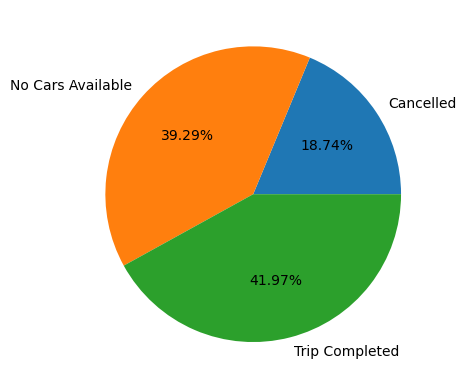

In [15]:
#plot a pie chart to show the number of trips of each type
y=np.array([1264,2650,2831])
statuslabels=["Cancelled","No Cars Available","Trip Completed"]
plt.pie(y,labels=statuslabels,autopct="%2.2f%%")

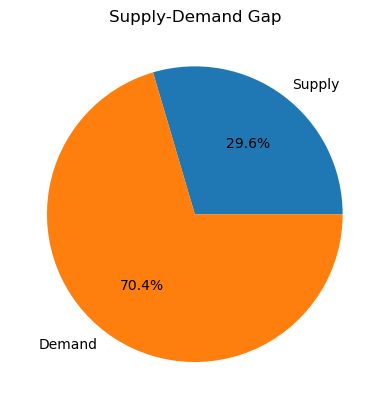

In [16]:
#plot a bar chart to show the supply demand gap
x = ["Supply", "Demand"]
y = np.array([2831, 6745])

plt.pie(y, labels=x, autopct="%1.1f%%")
plt.title("Supply-Demand Gap")
plt.show()


In [17]:
#convert the hours column to list format
cancelled_hour=cancelled_trips['Request_Hour'].tolist()
notavailable_hour=no_cars_available['Request_Hour'].tolist()

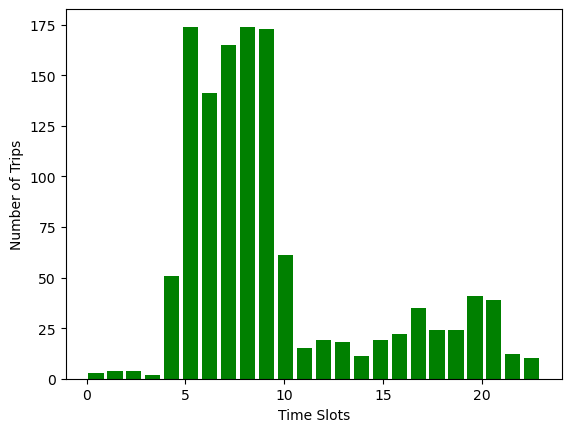

In [18]:
#plot a histogram to show the time slots when trips got cancelled
range=(0,23)
bins=24
def plots(q):
    plt.hist(q,bins,range,color='green',histtype='bar',rwidth=0.8)
    plt.xlabel('Time Slots')
    plt.ylabel('Number of Trips')
    
plots(cancelled_hour)    

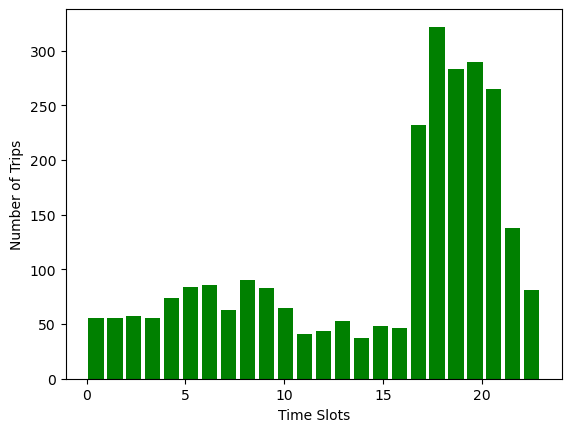

In [19]:
#plot a histogram to show the time slots when cars were not aavailable
plots(notavailable_hour)

In [20]:
#filter unsuccessful trips from city to airport
city_to_airport=data[(data.Status!='Trip Completed') & (data.Pickup_Point=='City')]
print(city_to_airport.shape)

(1969, 6)


In [21]:
#filter unsuccessful trips from airport to city
airport_to_city=data[(data.Status!='Trip Completed') & (data.Pickup_Point=='Airport')]
print(airport_to_city.shape)

(1875, 6)


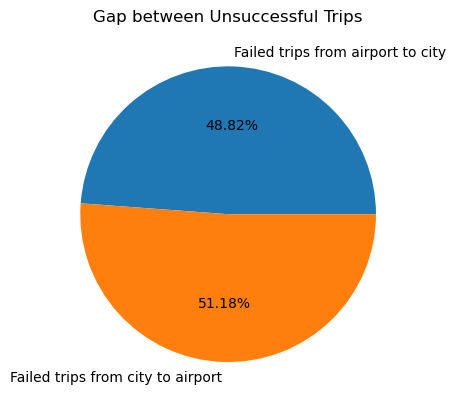

In [25]:
#plot a bar to show the gap between unsuccessful trips from city to airport and from airport to city

categories = ["Failed trips from airport to city", "Failed trips from city to airport"]
counts = np.array([1911, 2003])

plt.pie(counts, labels=categories, autopct='%2.2f%%')
plt.title("Gap between Unsuccessful Trips")
plt.show()


In [26]:
#filter cancelled trips from city to airport
city_to_airport_cancelled=data[(data.Status=='Cancelled') & (data.Pickup_Point == 'City')]


In [28]:
#filter trips from city to airport when cars were not available
city_to_airport_not_available=data[(data.Status=='No Cars Available') & (data.Pickup_Point=='City')]

In [29]:
#filter cancelled trips from airport to city
airport_to_city_cancelled=data[(data.Status=='Cancelled') & (data.Pickup_Point=='Airport')]

In [31]:
#filter trips from airport to city when cars were not available
airport_to_city_not_available=data[(data.Status=='No Cars Available') & (data.Pickup_Point=='Airport')]

In [32]:
#convert the hours column to list format
city_to_airport_cancelled_hour=city_to_airport_cancelled['Request_Hour'].tolist()

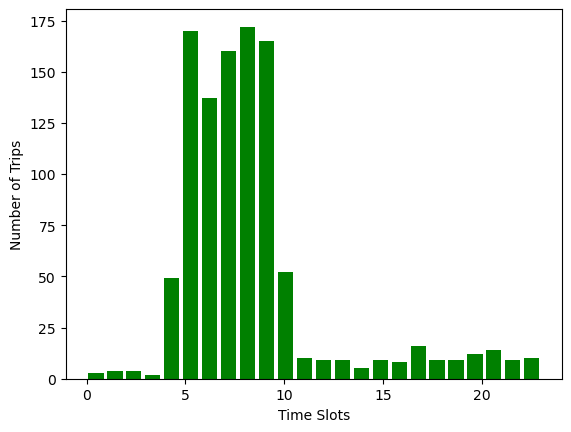

In [33]:
#plot a histogram to show the time slots when trip from city to airport got cancelled
plots(city_to_airport_cancelled_hour)

In [34]:
#convert the hours columns to list format
city_to_airport_not_available_hour=city_to_airport_not_available['Request_Hour'].tolist()

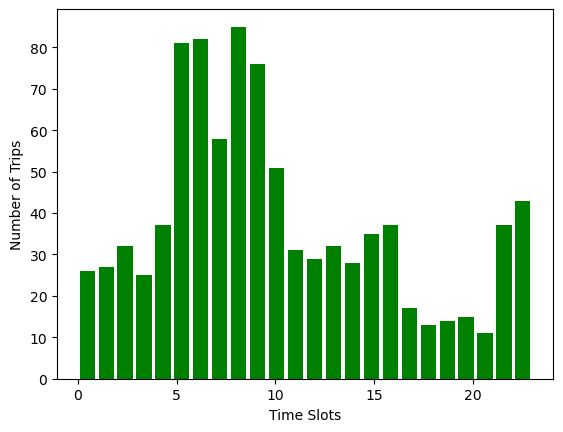

In [35]:
#plot a histogram to show the time slots when cars were nt available for city to airport trip
plots(city_to_airport_not_available_hour)

In [36]:
#convert the hours column to list format
airport_to_city_cancelled_hour=airport_to_city_cancelled['Request_Hour'].tolist()

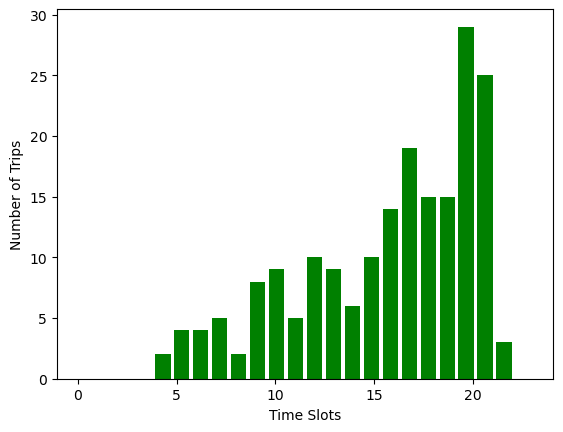

In [37]:
#plot the histogram to show the time slots when trip from airport to city got cancelled
plots(airport_to_city_cancelled_hour)

In [38]:
#convert the hours column to list format
airport_to_city_not_available_hour=airport_to_city_not_available['Request_Hour'].tolist()

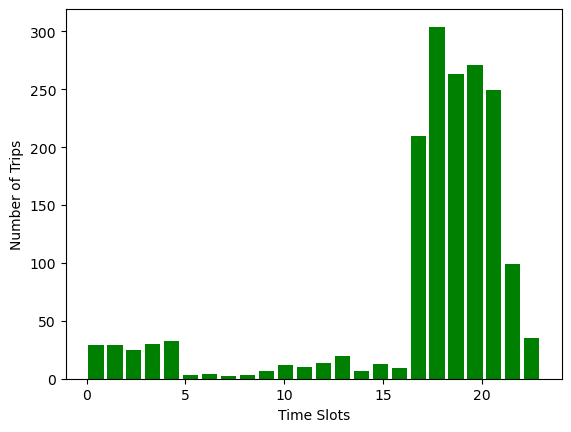

In [39]:
#plot a histogram to show the time slots when cars weere not available for airport to city trip
plots(airport_to_city_not_available_hour)

Conclusion

1. Heavy demand in the city from 4 am to 11 pm
2. Heavy demand at the airport from 5 pm to 11 pm

In [43]:
# input excel file path
inputExcelFile ="C://Users//Rakesh//Downloads//Second_Dataset.xlsx"
# Reading an excel file
excelFile = pd.read_excel (inputExcelFile)
# Converting excel file into CSV file
excelFile.to_csv ("Dataset.csv", index = None, header=True)
# Reading and Converting the output csv file into a dataframe object
data= pd.DataFrame(pd.read_csv("Dataset.csv"))

# Displaying the dataframe object
data


C:\ProgramData\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Unnamed: 6
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,NaN
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,NaN
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,NaN
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,NaN
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,NaN
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN,NaN


In [44]:
data.drop('Unnamed: 6', axis=1, inplace=True)

In [45]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [47]:
print(data.isnull().sum())

Request id              0
Pickup point          120
Driver id            2690
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [50]:
data['Driver id'] = data['Driver id'].replace(np.NaN, 0)
data['Drop timestamp'] = data['Drop timestamp'].replace(np.NaN, 0)

In [51]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,15-07-2016 23:49:03,0
6741,6752,Airport,0,No Cars Available,15-07-2016 23:50:05,0
6742,6751,City,0,No Cars Available,15-07-2016 23:52:06,0
6743,6754,City,0,No Cars Available,15-07-2016 23:54:39,0


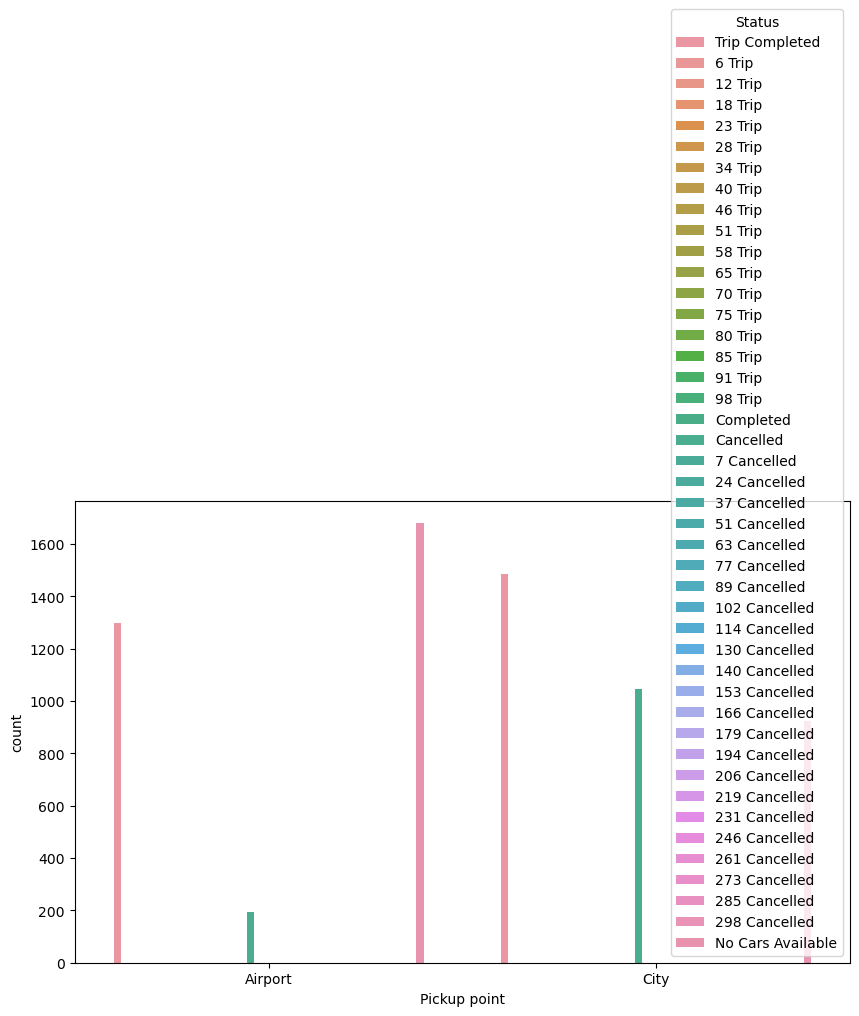

In [60]:
# Assuming 'data' is your DataFrame with columns 'Pickup point' and 'Status'
plt.figure(figsize=(10, 6))
sns.countplot(x="Pickup point", hue="Status",data=data)
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


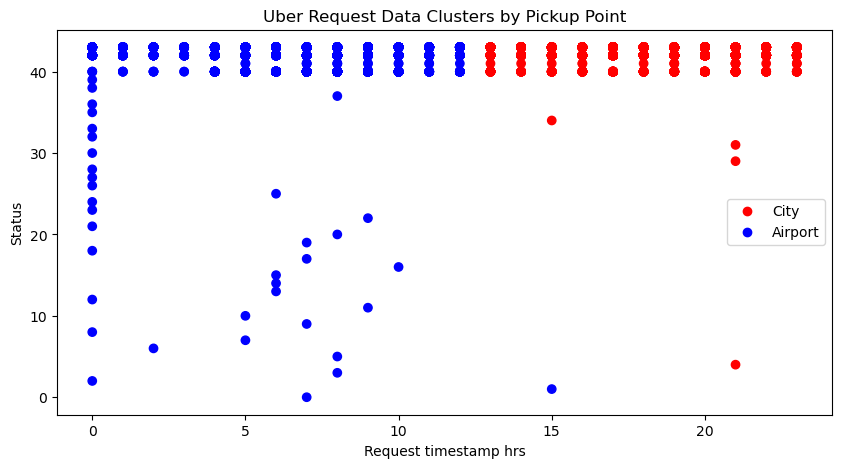

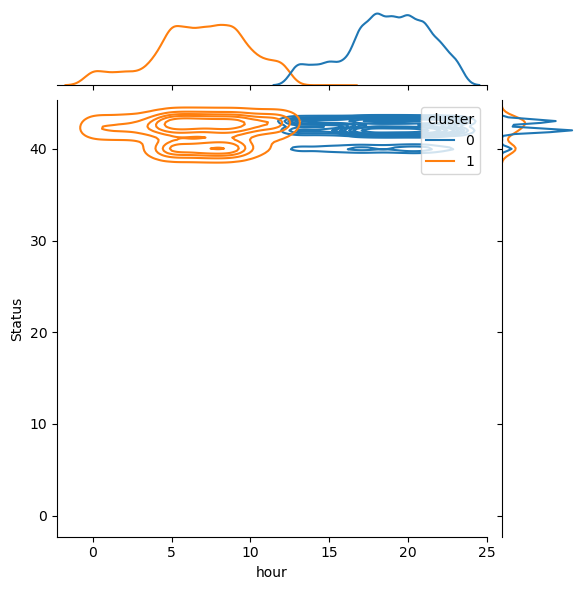

In [67]:
# Convert 'Request timestamp' to datetime
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'], errors='coerce')

# Extract hour from timestamp
data['hour'] = data['Request timestamp'].dt.hour

# Encode categorical variables 'Pickup point' and 'Status'
le = LabelEncoder()
data['Pickup point'] = le.fit_transform(data['Pickup point'])
data['Status'] = le.fit_transform(data['Status'])

# Replace NaN values in the data with 0
data.fillna(0, inplace=True)

# Initialize K-means with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++')

# Fit the data to the k-means algorithm
data['cluster'] = kmeans.fit_predict(data[['hour', 'Status', 'Pickup point']])

# Visualize the clusters using a scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
colors = np.array(['r', 'b'])
ax.scatter(data['hour'], data['Status'], c=colors[data['cluster']])
ax.set_xlabel('Request timestamp hrs')
ax.set_ylabel('Status')
ax.set_title('Uber Request Data Clusters by Pickup Point')
ax.legend(handles=[plt.Line2D([], [], color=colors[0], marker='o', linestyle='None', label='City'),
                    plt.Line2D([], [], color=colors[1], marker='o', linestyle='None', label='Airport')])
plt.show()

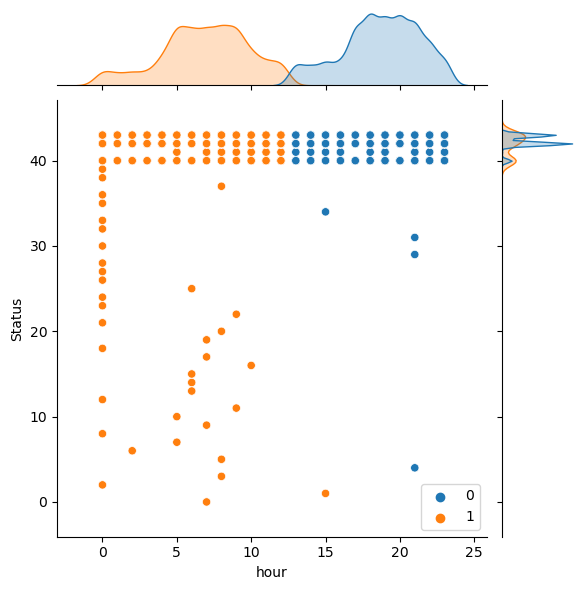

In [70]:
sns.jointplot(data=data,x=data['hour'],y=data['Status'],hue=kmeans.labels_)

In [71]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,cluster
0,619,0,1,43,2016-11-07 11:51:00,11/7/2016 13:00,11.0,1
1,867,0,1,43,2016-11-07 17:57:00,11/7/2016 18:47,17.0,0
2,1807,1,1,43,2016-12-07 09:17:00,12/7/2016 9:58,9.0,1
3,2532,0,1,43,2016-12-07 21:08:00,12/7/2016 22:03,21.0,0
4,3112,1,1,43,2016-07-13 08:33:16,13-07-2016 09:25:47,8.0,1
...,...,...,...,...,...,...,...,...
6740,6745,1,0,42,2016-07-15 23:49:03,0,23.0,0
6741,6752,0,0,42,2016-07-15 23:50:05,0,23.0,0
6742,6751,1,0,42,2016-07-15 23:52:06,0,23.0,0
6743,6754,1,0,42,2016-07-15 23:54:39,0,23.0,0
